1: Import Packages



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [ ]:
df = pd.read_csv ("/content/Perseverance_Landing.csv")

In [ ]:
df.head()

,Unnamed: 0,time,comment
0,0,0:03,was uppp everyone
1,1,0:05,this is it
2,2,0:07,bobchamp
3,3,0:07,Omg Im so excited for this
4,4,0:07,french here


In [ ]:
# convert time column to minutes past midnight, column label "time"
df['time'] = df['time'].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(x.split(':')))))

In [ ]:
#change all comments to lowercase

df['comment'] = df['comment'].str.lower()

In [ ]:
#create the 15 minute time bucket intervals, column label "time_buckets"

time_buckets = pd.cut(df['time'], bins=range(0, 1501,15), right=False)

In [ ]:
#combine time buckets with comments, name "time_bucket"

df['time_bucket'] = time_buckets

In [ ]:
#count occurences of each phrase within a 15 minute interval
phrase_counts = df.groupby('time_bucket')['comment'].apply(lambda x: Counter(x)).reset_index()

<ipython-input-8-a82d1f7f9bba>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phrase_counts = df.groupby('time_bucket')['comment'].apply(lambda x: Counter(x)).reset_index()


In [ ]:
df.head()

,Unnamed: 0,time,comment,time_bucket
0,0,3,was uppp everyone,"[0, 15)"
1,1,5,this is it,"[0, 15)"
2,2,7,bobchamp,"[0, 15)"
3,3,7,omg im so excited for this,"[0, 15)"
4,4,7,french here,"[0, 15)"


In [ ]:
# Group by 'time_bucket' and find top 3 comments in each group
top_comments = df.groupby('time_bucket')['comment'].value_counts().groupby(level=0).nlargest(3)

top_comments = top_comments.groupby(level=0).filter(lambda x: len(x) > 1)

<ipython-input-9-76802ec4482d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_comments = df.groupby('time_bucket')['comment'].value_counts().groupby(level=0).nlargest(3)
<ipython-input-9-76802ec4482d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_comments = df.groupby('time_bucket')['comment'].value_counts().groupby(level=0).nlargest(3)
<ipython-input-9-76802ec4482d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

In [ ]:
# Iterate through top_comments and print the values
for time_bucket, comments in top_comments.groupby(level=0):
    print(f"Time Bucket: {time_bucket}")
    for comment, frequency in comments.items():
        print(f"Comment: {comment}, Frequency: {frequency}")
    print()

<ipython-input-10-4d16c90177c0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for time_bucket, comments in top_comments.groupby(level=0):


Time Bucket: [0, 15)
Comment: (Interval(0, 15, closed='left'), Interval(0, 15, closed='left'), 'heck uyea'), Frequency: 1
Comment: (Interval(0, 15, closed='left'), Interval(0, 15, closed='left'), 'history'), Frequency: 1
Comment: (Interval(0, 15, closed='left'), Interval(0, 15, closed='left'), 'finally lets watch the perseverence land'), Frequency: 1

Time Bucket: [15, 30)
Comment: (Interval(15, 30, closed='left'), Interval(15, 30, closed='left'), 'i was here'), Frequency: 2
Comment: (Interval(15, 30, closed='left'), Interval(15, 30, closed='left'), 'hey'), Frequency: 2
Comment: (Interval(15, 30, closed='left'), Interval(15, 30, closed='left'), 'im so hyped for this'), Frequency: 1

Time Bucket: [30, 45)
Comment: (Interval(30, 45, closed='left'), Interval(30, 45, closed='left'), 'wow watching with my mom'), Frequency: 1
Comment: (Interval(30, 45, closed='left'), Interval(30, 45, closed='left'), 'yoo'), Frequency: 1
Comment: (Interval(30, 45, closed='left'), Interval(30, 45, closed='lef

In [23]:
print(df.columns)

Index(['Unnamed: 0', 'time', 'comment', 'time_bucket', 'comments_tokenized',
       'comments_nostop_tokenized', 'comments_lemmatized'],
      dtype='object')


In [24]:
#list the most repeated comments
top_comments.head()

,Comment,Frequency
129,nasa,1442
107,mar,1185
53,landing,683
31,mark,670
25,land,646


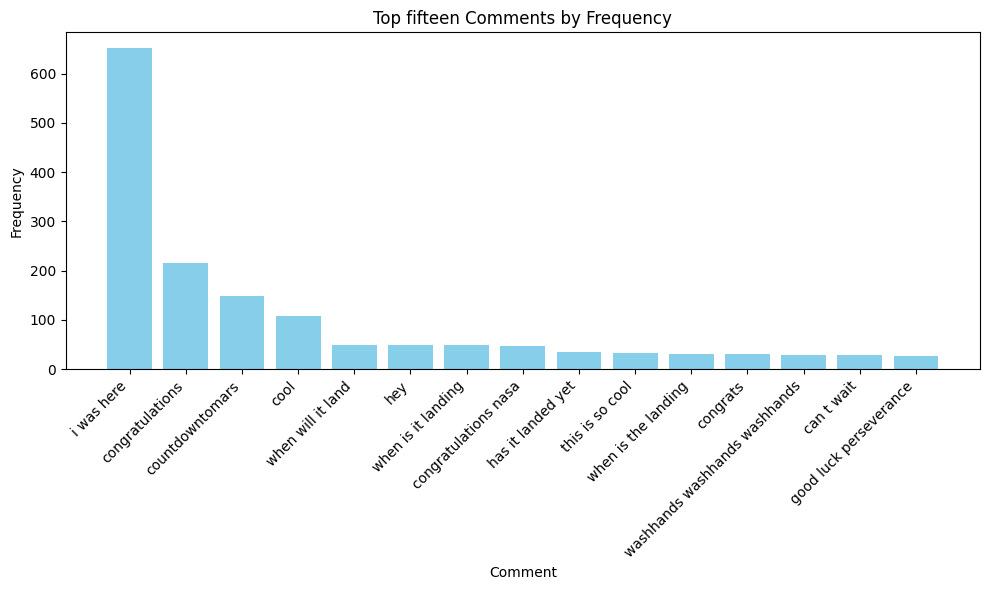

In [25]:
# Aggregate comment frequencies
comment_frequencies = df['comment'].value_counts().reset_index()
comment_frequencies.columns = ['comment', 'frequency']

# Sort by frequency in descending order and select top ten comments
top_fifteen_comments = comment_frequencies.head(15)

# Plotting the top ten comments
plt.figure(figsize=(10, 6))
plt.bar(top_fifteen_comments['comment'], top_fifteen_comments['frequency'], color='skyblue')
plt.xlabel('Comment')
plt.ylabel('Frequency')
plt.title('Top fifteen Comments by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#utilize regex expressions to group comments by meaning. Import necessary packages.

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#tokenize
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

df['comments_tokenized'] = df['comment'].apply(lambda x: tokenize(x.lower()))

df.head()

,Unnamed: 0,time,comment,time_bucket,comments_tokenized
0,0,3,was uppp everyone,"[0, 15)","[was, uppp, everyone]"
1,1,5,this is it,"[0, 15)","[this, is, it]"
2,2,7,bobchamp,"[0, 15)",[bobchamp]
3,3,7,omg im so excited for this,"[0, 15)","[omg, im, so, excited, for, this]"
4,4,7,french here,"[0, 15)","[french, here]"


In [ ]:
# remove stop words
stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(tokenized_list):
  stopword = set(stopwords.words('english'))  # Use a set for faster lookup
  text = [word for word in tokenized_list if word.lower() not in stopword]
  return text

df['comments_nostop_tokenized'] = df['comments_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()


,Unnamed: 0,time,comment,time_bucket,comments_tokenized,comments_nostop_tokenized
0,0,3,was uppp everyone,"[0, 15)","[was, uppp, everyone]","[uppp, everyone]"
1,1,5,this is it,"[0, 15)","[this, is, it]",[]
2,2,7,bobchamp,"[0, 15)",[bobchamp],[bobchamp]
3,3,7,omg im so excited for this,"[0, 15)","[omg, im, so, excited, for, this]","[omg, im, excited]"
4,4,7,french here,"[0, 15)","[french, here]",[french]


In [ ]:
## Download necessary NLTK resources if you haven't already
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()



def lemmatize(tokenized_list):
    text = [lemmatizer.lemmatize(word) for word in tokenized_list]
    return text



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['comments_nostop_tokenized'] = df['comments_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,Unnamed: 0,time,comment,time_bucket,comments_tokenized,comments_nostop_tokenized
0,0,3,was uppp everyone,"[0, 15)","[was, uppp, everyone]","[uppp, everyone]"
1,1,5,this is it,"[0, 15)","[this, is, it]",[]
2,2,7,bobchamp,"[0, 15)",[bobchamp],[bobchamp]
3,3,7,omg im so excited for this,"[0, 15)","[omg, im, so, excited, for, this]","[omg, im, excited]"
4,4,7,french here,"[0, 15)","[french, here]",[french]


In [ ]:
# Print stopword-removed lists for debugging
print("\nStopword-Removed Lists:")
print(df['comments_nostop_tokenized'])


Stopword-Removed Lists:
0      [uppp, everyone]
1                    []
2            [bobchamp]
3    [omg, im, excited]
4              [french]
Name: comments_nostop_tokenized, dtype: object


In [ ]:
df['comments_lemmatized'] = df['comments_nostop_tokenized'].apply(lambda x: lemmatize(x))

print("\nFinal DataFrame with Lemmatized Comments:")
print(df)


Final DataFrame with Lemmatized Comments:
       Unnamed: 0  time                            comment  time_bucket  \
0               0     3                  was uppp everyone  [0.0, 15.0)   
1               1     5                         this is it  [0.0, 15.0)   
2               2     7                           bobchamp  [0.0, 15.0)   
3               3     7         omg im so excited for this  [0.0, 15.0)   
4               4     7                        french here  [0.0, 15.0)   
...           ...   ...                                ...          ...   
16125       16125  7901                  r i p david bowie          NaN   
16126       16126  7901  _perfect_effect_ nice to meet you          NaN   
16127       16127  7901                       its finished          NaN   
16128       16128  7902                           bye chat          NaN   
16129       16129  7903       congratulations team go nasa          NaN   

                            comments_tokenized  \
0     

In [ ]:
# Convert the list of lemmatized comments into a single list
all_comments = [comment for sublist in df['comments_lemmatized'] for comment in sublist]

# Count the frequency of each lemmatized comment
comment_counts = Counter(all_comments)

In [ ]:
# Convert the Counter object to a DataFrame
comment_counts_df = pd.DataFrame(comment_counts.items(), columns=['Comment', 'Frequency'])

# Sort by frequency in descending order and get the top 15
top_comments = comment_counts_df.sort_values(by='Frequency', ascending=False).head(15)

<ipython-input-22-e3b37ec6865e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Comment', data=top_comments, palette='viridis')


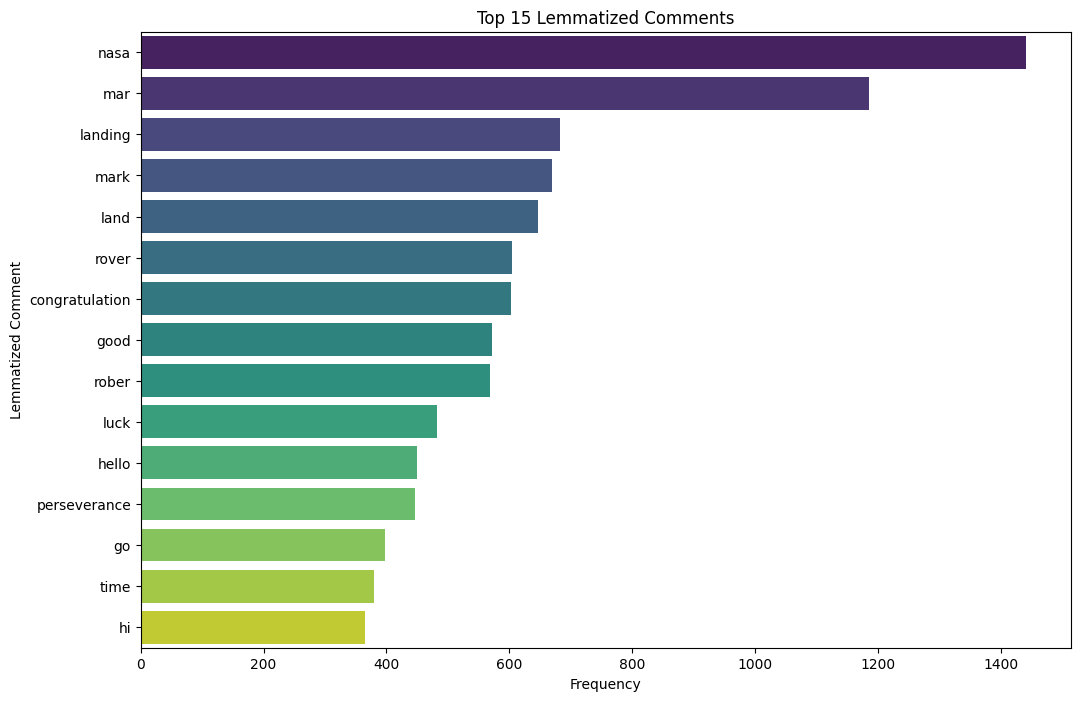

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a barplot
sns.barplot(x='Frequency', y='Comment', data=top_comments, palette='viridis')

# Add titles and labels
plt.title('Top 15 Lemmatized Comments')
plt.xlabel('Frequency')
plt.ylabel('Lemmatized Comment')

# Show the plot
plt.show()